### **Set-up**

In [2]:
#Mount your Google Drive to easily read and write files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [18]:
#Load data

testData = pd.read_csv(r"/content/drive/My Drive/heart_modified.csv")
dsc = testData.describe()
data_top = testData.head()
data = testData.to_numpy()

#print out the shape and column names of DataFrame
print(testData.shape)
print(list(testData.columns.values))
display(data_top)
display(dsc)

(918, 11)
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,65,M,ASY,114,318,ST,140,N,4.4,Down,1
1,62,M,ASY,128,223,ST,119,Y,2.0,Down,1
2,56,M,ASY,140,298,Normal,122,Y,4.2,Flat,1
3,59,M,ASY,180,285,ST,120,Y,1.5,Flat,1
4,71,M,ASY,185,0,Normal,98,Y,0.0,Up,1


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,59.218954,132.396514,198.799564,136.809368,0.887364,0.553377
std,11.317997,18.514154,109.384145,25.460334,1.066570,0.497414
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,51.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,60.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,67.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,87.000000,200.000000,603.000000,202.000000,6.200000,1.000000


### **Data Visualization**

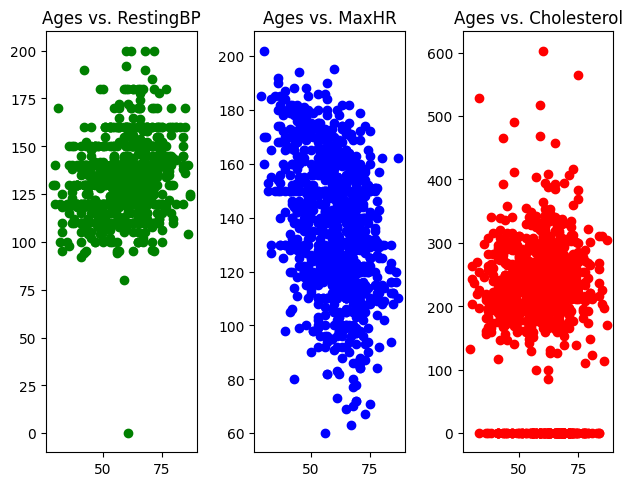

In [21]:
# Visualize the relationship between features
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()
fig.clf()

ax1 = fig.add_subplot(131)
ax1.set_title('Ages vs. RestingBP')
ax1.scatter(data[:,0],data[:,3],color ='green')

ax2 = fig.add_subplot(132)
ax2.set_title('Ages vs. MaxHR')
ax2.scatter(data[:,0],data[:,6],color ='blue')

ax3 = fig.add_subplot(133)
ax3.set_title('Ages vs. Cholesterol')
ax3.scatter(data[:,0],data[:,4],color ='red')

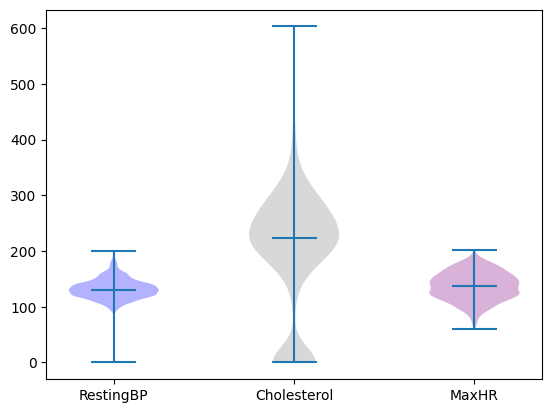

In [36]:
# Create violin plots to learn about distribution of features
# Convert the data to numeric type, handling potential errors
data = testData.apply(pd.to_numeric, errors='coerce').to_numpy()

# Remove rows with NaN values in the selected columns
valid_indices = ~np.isnan(data[:, [3, 4, 6]]).any(axis=1)
filtered_data = data[valid_indices]

vp = plt.violinplot([data[:,3],data[:,4],data[:,6]],showmedians=True)
plt.xticks([1, 2, 3],['RestingBP', 'Cholesterol', 'MaxHR'])
color=['blue','gray','purple']
for i in range(len(vp['bodies'])):
  vp['bodies'][i].set(facecolor=color[i])
plt.show()

### **Train Classifier**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

In [52]:
# Split the data to training and test set
# 20% of the data is kept for testing
X = data[:, :-1]  # Select all columns except the last one as features
y = data[:, -1]   # Select the last column as the target variable
(data_train_x, data_test_x, data_train_y, data_test_y) = train_test_split(X, y, test_size=0.2)
print(data_train_x.shape)

(734, 10)


In [53]:
#Normalize data
# Impute NaN values with the mean of each column
#!pip install sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_train_x = imputer.fit_transform(data_train_x)
data_test_x = imputer.transform(data_test_x)

normalizer_train = Normalizer().fit(X=data_train_x)

data_train_normalized = normalizer_train.transform(data_train_x)
data_test_normalized = normalizer_train.transform(data_test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2 5 7 9]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2 5 7 9]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [54]:
#Train and predict
model = LogisticRegression(C=5)
model.fit(data_train_normalized, data_train_y)

train_pred = model.predict(data_train_normalized)
test_pred = model.predict(data_test_normalized)

print("Accuracy - training:", (train_pred==data_train_y).mean())
print("Accuracy - test:", (test_pred==data_test_y).mean())


Accuracy - training: 0.7247956403269755
Accuracy - test: 0.7282608695652174


### **Evaluate Classifier**
The metrics class provides a set of useful metrics you can use for your needs. For any classification task, you need to report mainly these metrics:

Accuracy : (TP + TN) / (TP + TN + FP + FN) Precision : TP / (TP + FP) F1 Score : 2TP / (2TP + FP + FN) Recall Score : TP / (TP + FN)

The cross_val_score class provides means of performing cross-validation on your model.

In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [45]:
#Accuracy, precision and recall
print("Accuracy:", metrics.accuracy_score(data_test_y,test_pred))
print("Precision:", metrics.precision_score(data_test_y,test_pred))
print("Recall:", metrics.recall_score(data_test_y,test_pred))
print(metrics.classification_report(data_test_y,test_pred))

Accuracy: 0.7717391304347826
Precision: 0.8041237113402062
Recall: 0.7722772277227723
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75        83
         1.0       0.80      0.77      0.79       101

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184

